In [20]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
cf.go_offline();
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns',None)

In [21]:
df = pd.read_csv("/content/Copy of amazon.csv")

In [22]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [23]:
# Display the current column names to verify the correct name of the column
print(df.columns)

# Drop the column if it exists, ignoring errors if it doesn't
df.drop('Unnamed:0', inplace=True, axis=1, errors='ignore')

# Display the first few rows of the DataFrame after dropping the column
df.head()


Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')


,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [24]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Missing values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(df, head=5, tail=5):
    print("SHAPE".center(82, '~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print("TYPES".center(82, '~'))
    print(df.dtypes)
    print("".center(82, '~'))
    print(missing_values_analysis(df))
    print('DUPLICATED VALUES'.center(83, '~'))
    print(df.duplicated().sum())
    print("QUANTILES".center(82, '~'))
    print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

# Assuming 'df' is the DataFrame you want to analyze
# Replace this with your actual DataFrame

# Call the function to check the DataFrame
check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 4915
Columns: 12
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Unnamed: 0                int64
reviewerName             object
overall                   int64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              Missing values  Ratio
reviewerName               1   0.02
reviewText                 1   0.02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                       0.00   0.05    0.50         0.

In [25]:
def check_class(dataframe):
    # Create a DataFrame to store the number of unique classes for each variable
    nunique_df = pd.DataFrame({
        'Variable': dataframe.columns,
        'Classes': [dataframe[i].nunique() for i in dataframe.columns]
    })

    # Sort the DataFrame by the number of unique classes in descending order
    nunique_df = nunique_df.sort_values('Classes', ascending=False)

    # Reset the index of the DataFrame
    nunique_df.reset_index(drop=True, inplace=True)

    return nunique_df

# Assuming 'df' is the DataFrame you want to analyze
# Replace this with your actual DataFrame

# Call the function to check the unique classes in each column
result_df = check_class(df)
print(result_df)  # Print the result

                Variable  Classes
0             Unnamed: 0     4915
1             reviewText     4912
2           reviewerName     4594
3             reviewTime      690
4               day_diff      690
5     wilson_lower_bound       40
6   score_average_rating       28
7     score_pos_neg_diff       27
8             total_vote       26
9            helpful_yes       23
10            helpful_no       17
11               overall        5


In [26]:
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [27]:
import pandas as pd

# Load the dataset
file_path = "/content/Copy of amazon.csv"  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Display the first few rows to verify the DataFrame
df.head()


,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [28]:
summary_stats = df.describe()

Summary Statistics:
        Unnamed: 0      overall     day_diff  helpful_yes   helpful_no  \
count  4915.000000  4915.000000  4915.000000  4915.000000  4915.000000   
mean   2457.000000     4.587589   437.367040     1.311089     0.210376   
std    1418.982617     0.996845   209.439871    41.619161     4.023296   
min       0.000000     1.000000     1.000000     0.000000     0.000000   
25%    1228.500000     5.000000   281.000000     0.000000     0.000000   
50%    2457.000000     5.000000   431.000000     0.000000     0.000000   
75%    3685.500000     5.000000   601.000000     0.000000     0.000000   
max    4914.000000     5.000000  1064.000000  1952.000000   183.000000   

        total_vote  score_pos_neg_diff  score_average_rating  \
count  4915.000000         4915.000000           4915.000000   
mean      1.521465            1.100712              0.075468   
std      44.123095           39.367949              0.256062   
min       0.000000         -130.000000              0.000

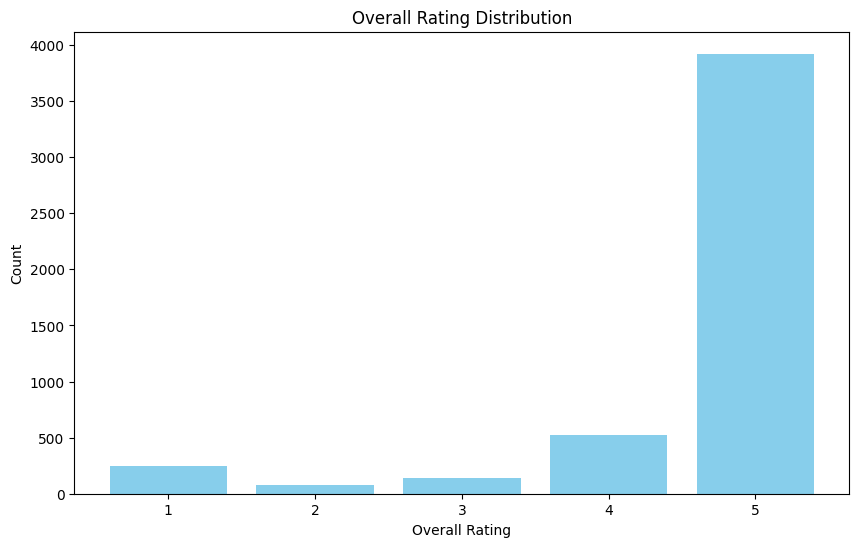

In [29]:
# Summary statistics
summary_stats = df.describe()

# Distribution of 'overall' ratings
overall_distribution = df['overall'].value_counts()

# Display summary statistics and overall distribution
print("Summary Statistics:")
print(summary_stats)
print("\nOverall Distribution:")
print(overall_distribution)

# Visualize the overall distribution using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(overall_distribution.index, overall_distribution.values, color='skyblue')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.title('Overall Rating Distribution')
plt.show()


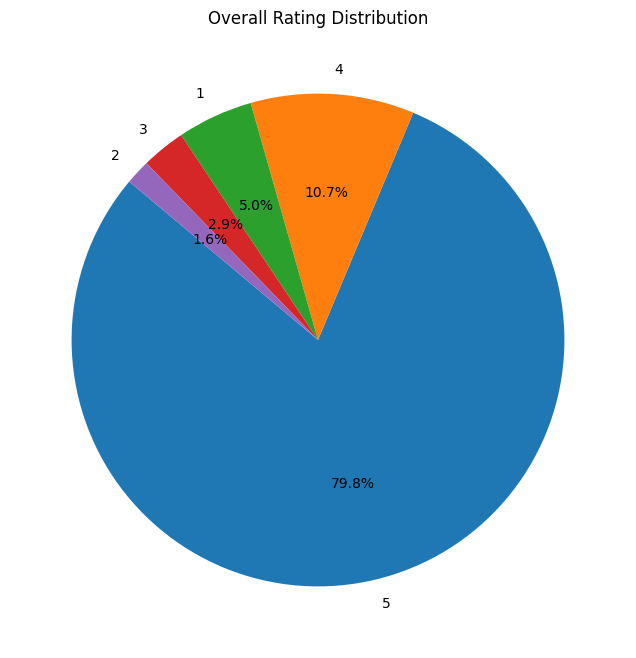

In [30]:
# Visualize the overall distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(overall_distribution, labels=overall_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Overall Rating Distribution')
plt.show()

In [31]:
df.reviewText.head()

0                                           No issues.
1    Purchased this for my device, it worked as adv...
2    it works as expected. I should have sprung for...
3    This think has worked out great.Had a diff. br...
4    Bought it with Retail Packaging, arrived legit...
Name: reviewText, dtype: object

In [32]:
review_example = df.reviewText[2031]
review_example

'[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father\'s Day and I\'ve been loving it ever since.  Just as other with Samsung products, the Galaxy Tab 4 has the ability to add a microSD card to expand the memory on the device.  Since it\'s been over a year, I decided to do some more research to see if SanDisk offered anything new.  As of 6/19/2014, their product lineup for microSD cards from worst to best (performance-wise) are the as follows:SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow, the difference between all of these cards are simply the speed in which you can read/write data to the card.  Yes, the published rating of most all these cards (except the SanDisk regular) are Class 10/UHS-I but that\'s just a rating... Actual real world performance does get better with each model, but with faster cards come more expensive prices.  Since Amazon doesn\'t carry the Ultra PLUS model of microSD card, I had 

In [33]:
review_example=review_example.lower().split()

In [34]:
review_example

['[[',
 'update',
 '-',
 '6/19/2014',
 ']]so',
 'my',
 'lovely',
 'wife',
 'bought',
 'me',
 'a',
 'samsung',
 'galaxy',
 'tab',
 '4',
 'for',
 "father's",
 'day',
 'and',
 "i've",
 'been',
 'loving',
 'it',
 'ever',
 'since.',
 'just',
 'as',
 'other',
 'with',
 'samsung',
 'products,',
 'the',
 'galaxy',
 'tab',
 '4',
 'has',
 'the',
 'ability',
 'to',
 'add',
 'a',
 'microsd',
 'card',
 'to',
 'expand',
 'the',
 'memory',
 'on',
 'the',
 'device.',
 'since',
 "it's",
 'been',
 'over',
 'a',
 'year,',
 'i',
 'decided',
 'to',
 'do',
 'some',
 'more',
 'research',
 'to',
 'see',
 'if',
 'sandisk',
 'offered',
 'anything',
 'new.',
 'as',
 'of',
 '6/19/2014,',
 'their',
 'product',
 'lineup',
 'for',
 'microsd',
 'cards',
 'from',
 'worst',
 'to',
 'best',
 '(performance-wise)',
 'are',
 'the',
 'as',
 'follows:sandisksandisk',
 'ultrasandisk',
 'ultra',
 'plussandisk',
 'extremesandisk',
 'extreme',
 'plussandisk',
 'extreme',
 'pronow,',
 'the',
 'difference',
 'between',
 'all',
 'o

In [35]:
import re

In [36]:
rt=lambda x: re.sub("[^a-zA-Z]",'',str(x))
df["reviewText"]=df["reviewText"].map(rt)
df["reviewText"]=df["reviewText"].str.lower()
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,noissues,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,purchasedthisformydeviceitworkedasadvertisedyo...,25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,itworksasexpectedishouldhavesprungforthehigher...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,thisthinkhasworkedoutgreathadadiffbrangbcardan...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,boughtitwithretailpackagingarrivedlegitinaoran...,13-07-2013,513,0,0,0,0,0.0,0.0


In [37]:
import pandas as pd

# Load the dataset
file_path = "/content/Copy of amazon.csv"
df = pd.read_csv("/content/Copy of amazon.csv")

# Display the first few rows of the DataFrame to understand the data
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [38]:
!pip install vaderSentiment

In [39]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [19]:
!pip install textblob vaderSentiment

In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis using VADER
def analyze_sentiment_vader(text):
    # Check for NaN values and return 'Neutral' if found
    if isinstance(text, float) and np.isnan(text):
        return "Neutral"

    vs_score = analyzer.polarity_scores(str(text))
    if vs_score['compound'] >= 0.05:
        return "Positive"
    elif vs_score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [41]:
df['vader_sentiment'] = df['reviewText'].apply(analyze_sentiment_vader)

In [42]:
def plot_sentiment_bar_chart(df, method):
    # Count the number of occurrences for each sentiment using the specified method
    sentiment_counts = df[method].value_counts()

    # Plot a bar chart
    plt.figure(figsize=(8, 6))
    sentiment_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Sentiment Distribution (' + method.capitalize() + ')')
    plt.xticks(rotation=0)
    plt.show()


In [43]:
def plot_sentiment_pie_chart(df, method):
    # Count the number of occurrences for each sentiment using the specified method
    sentiment_counts = df[method].value_counts()

    # Plot a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Sentiment Distribution (' + method.capitalize() + ')')
    plt.show()


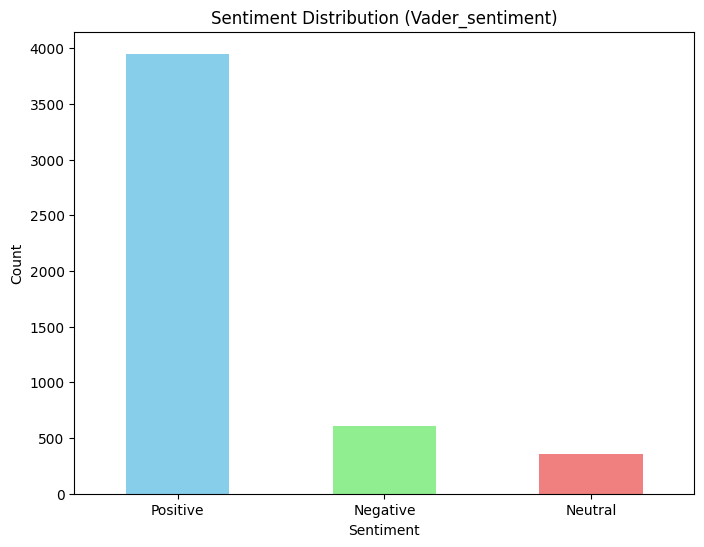

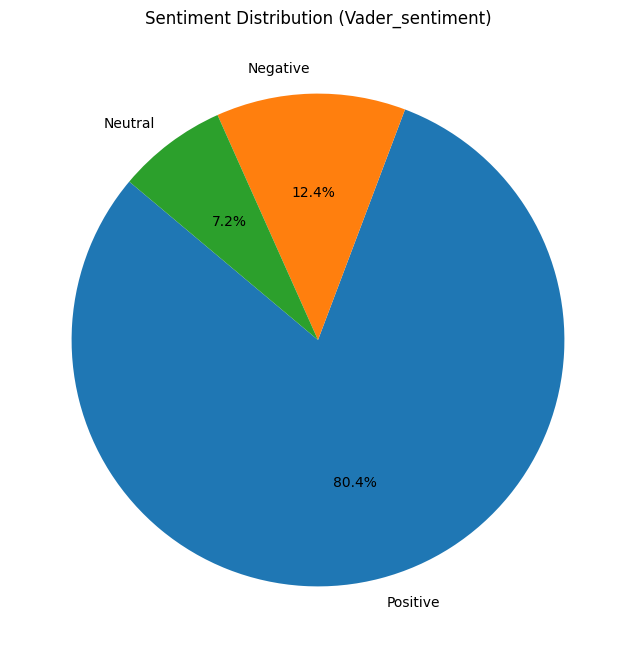

In [44]:
plot_sentiment_bar_chart(df, 'vader_sentiment')
plot_sentiment_pie_chart(df, 'vader_sentiment')

In [45]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import random

In [46]:
data = {
    'reviewText': ["I bought this to use with my go pro hero 3 black edition. It requires a class 10 MicroSDXC card. So far I've had no issues with it. Fast read/write, came with adapter, small packaging, but that's all it needed! Comes with a nice hard plastic case to keep both dry and together if needed."]
}
df = pd.DataFrame(data)

In [47]:
# Function to classify sentiment using VADER and TextBlob
def classify_sentiment(sentence):
    vader_score = SentimentIntensityAnalyzer().polarity_scores(sentence)
    vader_sentiment = "Positive" if vader_score['compound'] >= 0.05 else "Negative" if vader_score['compound'] <= -0.05 else "Neutral"

    textblob_polarity = TextBlob(sentence).sentiment.polarity
    textblob_sentiment = "Positive" if textblob_polarity > 0 else "Negative" if textblob_polarity < 0 else "Neutral"

    return vader_sentiment, textblob_sentiment

In [48]:
# Select the only sentence from 'reviewText'
random_sentence = df.loc[0, 'reviewText']

In [49]:
# Classify sentiment for the selected sentence
vader_sentiment, textblob_sentiment = classify_sentiment(random_sentence)

In [50]:
# Print the selected sentence and its sentiment classification
print("Selected sentence:", random_sentence)
print("VADER Sentiment:", vader_sentiment)
print("TextBlob Sentiment:", textblob_sentiment)

Selected sentence: I bought this to use with my go pro hero 3 black edition. It requires a class 10 MicroSDXC card. So far I've had no issues with it. Fast read/write, came with adapter, small packaging, but that's all it needed! Comes with a nice hard plastic case to keep both dry and together if needed.
VADER Sentiment: Positive
TextBlob Sentiment: Positive
